<a href="https://colab.research.google.com/github/gummallaprasanth/DL-Project-MNIST-Digital-classification-Using-Neural-Network/blob/main/DL_Project_MNIST_Digital_classification_Using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification using Deep learning(Neural network)

## Importing dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

###Loading mnist data from keras.dataset
from keras documentaion we can load the dataset. the data has been done preprocessing already so we don't need to preprocessing operations and also splited the data previously

keras link https://keras.io/api/datasets/mnist/

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
# type of the x_train
type(x_train)

numpy.ndarray

In [9]:
# shape of the numpy arrays
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


X_train contains the images of numbers (image of 9)(60000 images )

Y_train contains the detected value of images (9)

Same as x_test and y_test ( in test data 10000 images)

In this data contain handwritten of numbers upto 1 to 9

Data contain the grayscale images(black nad white) --> 1channel

Dimensions of all images is 28 x 28

In [10]:
# printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [12]:
# check the shape of the shape
print(x_train[10].shape)

(28, 28)


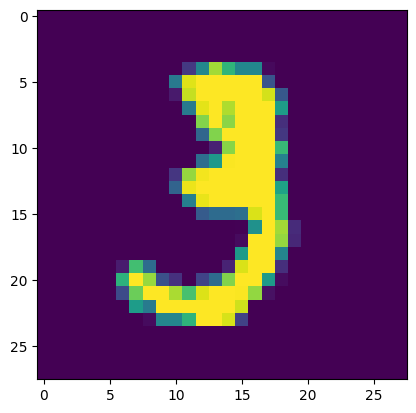

3


In [17]:
# display the image
plt.imshow(x_train[10])
plt.show()

# printing the corresponding label
print(y_train[10])

it is a grayscale image but in the matplotlib we can get it as a colored image

Image labels

In [18]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [20]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset if not we have to resize the images dimensions

 scaling the images values, that means the values is  in range of 0 - 255 its difficult to understand the machine so we need to normalize the values into certain range as 0 to 1
 this process is also called as normalization

In [21]:
# scaling the values
x_train=x_train/255
x_test=x_test/255


In [22]:
# print the image of 10
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

sucessfully changed the values of images

# Build the Neural Network

In [24]:
# setting up the layers of the Neural network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer
    keras.layers.Dense(50,activation='relu'), # layer 1 having 50 neurons with activation function as relu
    keras.layers.Dense(50,activation='relu'), # layer 2 having 50 neurons with activation function as relu
    keras.layers.Dense(10,activation='sigmoid') # output layer contains 10 nurons beacuse the output should be in range of 1 to 9 labels
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# compiling the neural netork

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# train th neural network

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8536 - loss: 0.5118
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9558 - loss: 0.1512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9677 - loss: 0.1082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0839
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0679
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0567
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9857 - loss: 0.0476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0406
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9892 - loss: 0.0354
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0316


The training data accuracy is 98.9%

**Accuracy on Test data**

In [27]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1384
0.9699000120162964


The test data accuracy is 97%

In [28]:
print(x_test.shape)

(10000, 28, 28)


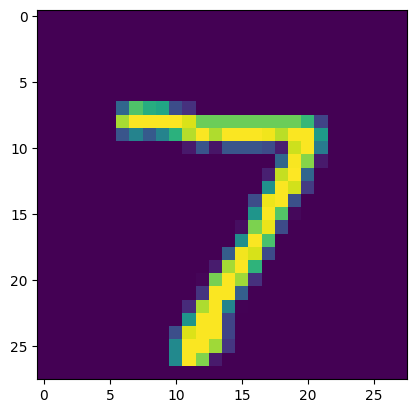

In [29]:
# first dta point in x_test
plt.imshow(x_test[0])

In [30]:
print(y_test[0])

7


In [31]:
# predictiing the model with one sample image
y_predicted=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [32]:
print(y_predicted.shape)

(10000, 10)


In [33]:
print(y_predicted[0]) # these values are  the probabilty of numbers

[5.6812476e-04 6.4150314e-04 3.7787635e-02 7.8996462e-01 7.1180889e-06
 1.7501855e-03 1.2484375e-13 9.9999684e-01 5.3053772e-01 7.8074509e-01]


Model.predict () gives prediction probability of each class

In [35]:
# converting the prediction probabilites to class label
label_for_first_test_image=np.argmax(y_predicted[0])
print(label_for_first_test_image)

7


In [ ]:
# before converting the probabilites of preidiction data
print(y_predicted)

[[5.6812476e-04 6.4150314e-04 3.7787635e-02 ... 9.9999684e-01
  5.3053772e-01 7.8074509e-01]
 [2.7371259e-02 4.5937064e-01 9.9999952e-01 ... 2.0796059e-10
  5.7564961e-05 1.2629139e-06]
 [5.9313094e-05 9.9865699e-01 8.7618463e-02 ... 3.5257810e-01
  3.9798298e-01 1.8237902e-02]
 ...
 [3.7261088e-12 4.9992682e-06 6.5001816e-11 ... 1.3810189e-01
  1.6664121e-03 5.7912551e-02]
 [2.1206776e-07 1.9946476e-08 3.1415945e-07 ... 4.2614882e-04
  9.9750221e-01 2.2277480e-04]
 [1.0710634e-05 2.6411265e-10 3.2235592e-04 ... 6.7691203e-10
  2.8360373e-05 5.0267412e-09]]


In [37]:
# converting the prediction probabilities to class label for all test data points
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 9, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels (contains numbes 1 to 9)

y_predicted ---> contains probabilities in the form of array

Y_predicted_labels -->  predicted labels contains the which number has the maximum probability

Confusion matrix

In [39]:
# print the confusion matrix

confusion = confusion_matrix(y_test,y_predicted_labels)
print(confusion)

tf.Tensor(
[[ 965    0    1    2    3    2    2    0    2    3]
 [   0 1123    0    4    1    0    1    2    4    0]
 [   4    2  992    7    6    0    2   15    3    1]
 [   0    1    1  991    1    2    0    5    4    5]
 [   0    0    3    0  967    0    2    3    1    6]
 [   2    0    0   28    2  844    2    1    5    8]
 [   3    2    0    2   13    6  931    1    0    0]
 [   1    1    5    4    3    0    0  993    2   19]
 [   5    2    5   20    9    3    4    2  919    5]
 [   1    2    0    6   23    1    1    3    4  968]], shape=(10, 10), dtype=int32)


using the seaborn visualization to visualize the confusion matrix how many is predicted correct

Text(0.5, 47.7222222222222, 'Predicted Labels')

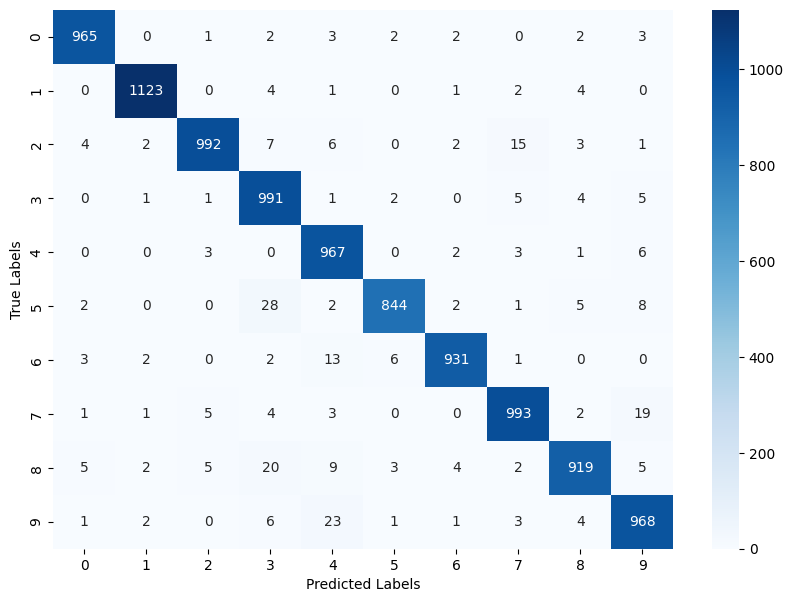

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

The diagonal values are the coreect prediction of the values

##Building a Predictive system

By using web get we download the image of 7 from the internet

In [47]:
!wget "https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png"

--2024-09-08 16:21:19--  https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png
Resolving machinelearningmastery.com (machinelearningmastery.com)... 172.67.72.46, 104.26.0.148, 104.26.1.148, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|172.67.72.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34970 (34K) [image/png]
Saving to: ‘sample_image.png’

sample_image.png    100%[===================>]  34.15K  --.-KB/s    in 0.007s  

2024-09-08 16:21:19 (4.67 MB/s) - ‘sample_image.png’ saved [34970/34970]



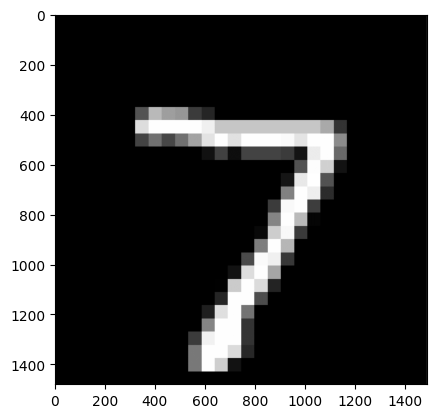

In [50]:
input_image=cv2.imread('digit_image.png')
plt.imshow(input_image)

In [54]:
# printing the shape of the imafge
print(input_image.shape)

(1480, 1490, 3)


The above shape information say's that the image is RGB (colored image)
so we need to conver this image into grayscale beacuse our model has trained with grayscale imagess so we convert this and predict the value

In [52]:
# check the type of image after converting into numpy array
type(input_image)

numpy.ndarray

In [53]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


The values of image array ranges from 1 to 255

In [55]:
# converting the RGB  image to grayscale image

gray=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

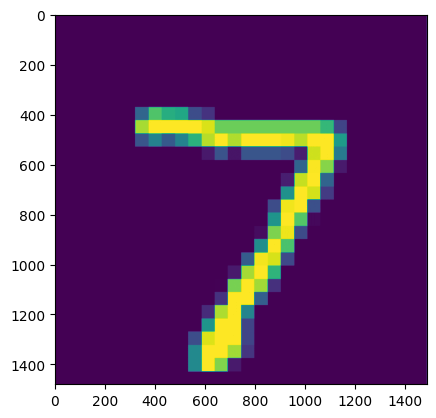

In [56]:
# now the image is in grayscale
plt.imshow(gray)

Previously the image in RGB now it converted into grayscale

Now we can resize  the image beacuse the dimensions of images should be same in size then only our model will predict with good accuracy

In [57]:
input_image_resize=cv2.resize(gray,(28,28))

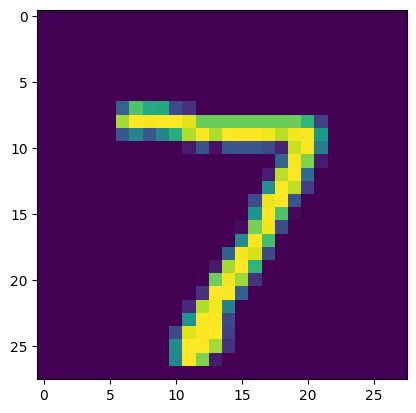

In [58]:
# now we can show the resized image
plt.imshow(input_image_resize)

sucessfully converted into 28x28 dimensions

Now we have to do scaling beacuse previously we did scaling to our train and test data so now we can do the same process to the input image

In [59]:
input_image_resize=input_image_resize/255

In [60]:
# reshape the image
input_image_reshaped=np.reshape(input_image_resize,[1,28,28]) # the reason for doing the reshape is
#  we are telling the machine model that we are doing only prediction for one image


In [61]:
# predicting the image
prediction=model.predict(input_image_reshaped)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[6.0370937e-04 6.6845282e-04 4.0449657e-02 8.0344623e-01 7.1186391e-06
  1.7425476e-03 1.3512840e-13 9.9999672e-01 5.2728772e-01 7.7840763e-01]]


It give in the form of array of probabilities so now we can use argmax to show the which number has highest probability

In [62]:
input_predict_label=np.argmax(prediction)
print(input_predict_label)

7


model Predicted that the image is 7 correctly

# Predictive system


we can get the iamge from the web internet get the image adress and download with help of the weg get

In [66]:
!wget 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQgEy8gd-Ydv5tnLL028Q1AAYLodrL_SMdj8GtlxYb3APJaQawP_103r_r1ufohknspy8&usqp=CAU'

--2024-09-08 16:55:12--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQgEy8gd-Ydv5tnLL028Q1AAYLodrL_SMdj8GtlxYb3APJaQawP_103r_r1ufohknspy8&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.250.101.100, 142.250.101.139, 142.250.101.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.250.101.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4576 (4.5K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTQgEy8gd-Ydv5tnLL028Q1AAYLodrL_SMdj8GtlxYb3APJaQawP_103r_r1ufohknspy8&usqp=CAU’

images?q=tbn:ANd9Gc 100%[===================>]   4.47K  --.-KB/s    in 0s      

2024-09-08 16:55:12 (48.1 MB/s) - ‘images?q=tbn:ANd9GcTQgEy8gd-Ydv5tnLL028Q1AAYLodrL_SMdj8GtlxYb3APJaQawP_103r_r1ufohknspy8&usqp=CAU’ saved [4576/4576]



Enter the path of the image to be predicted:/content/digit_image.png


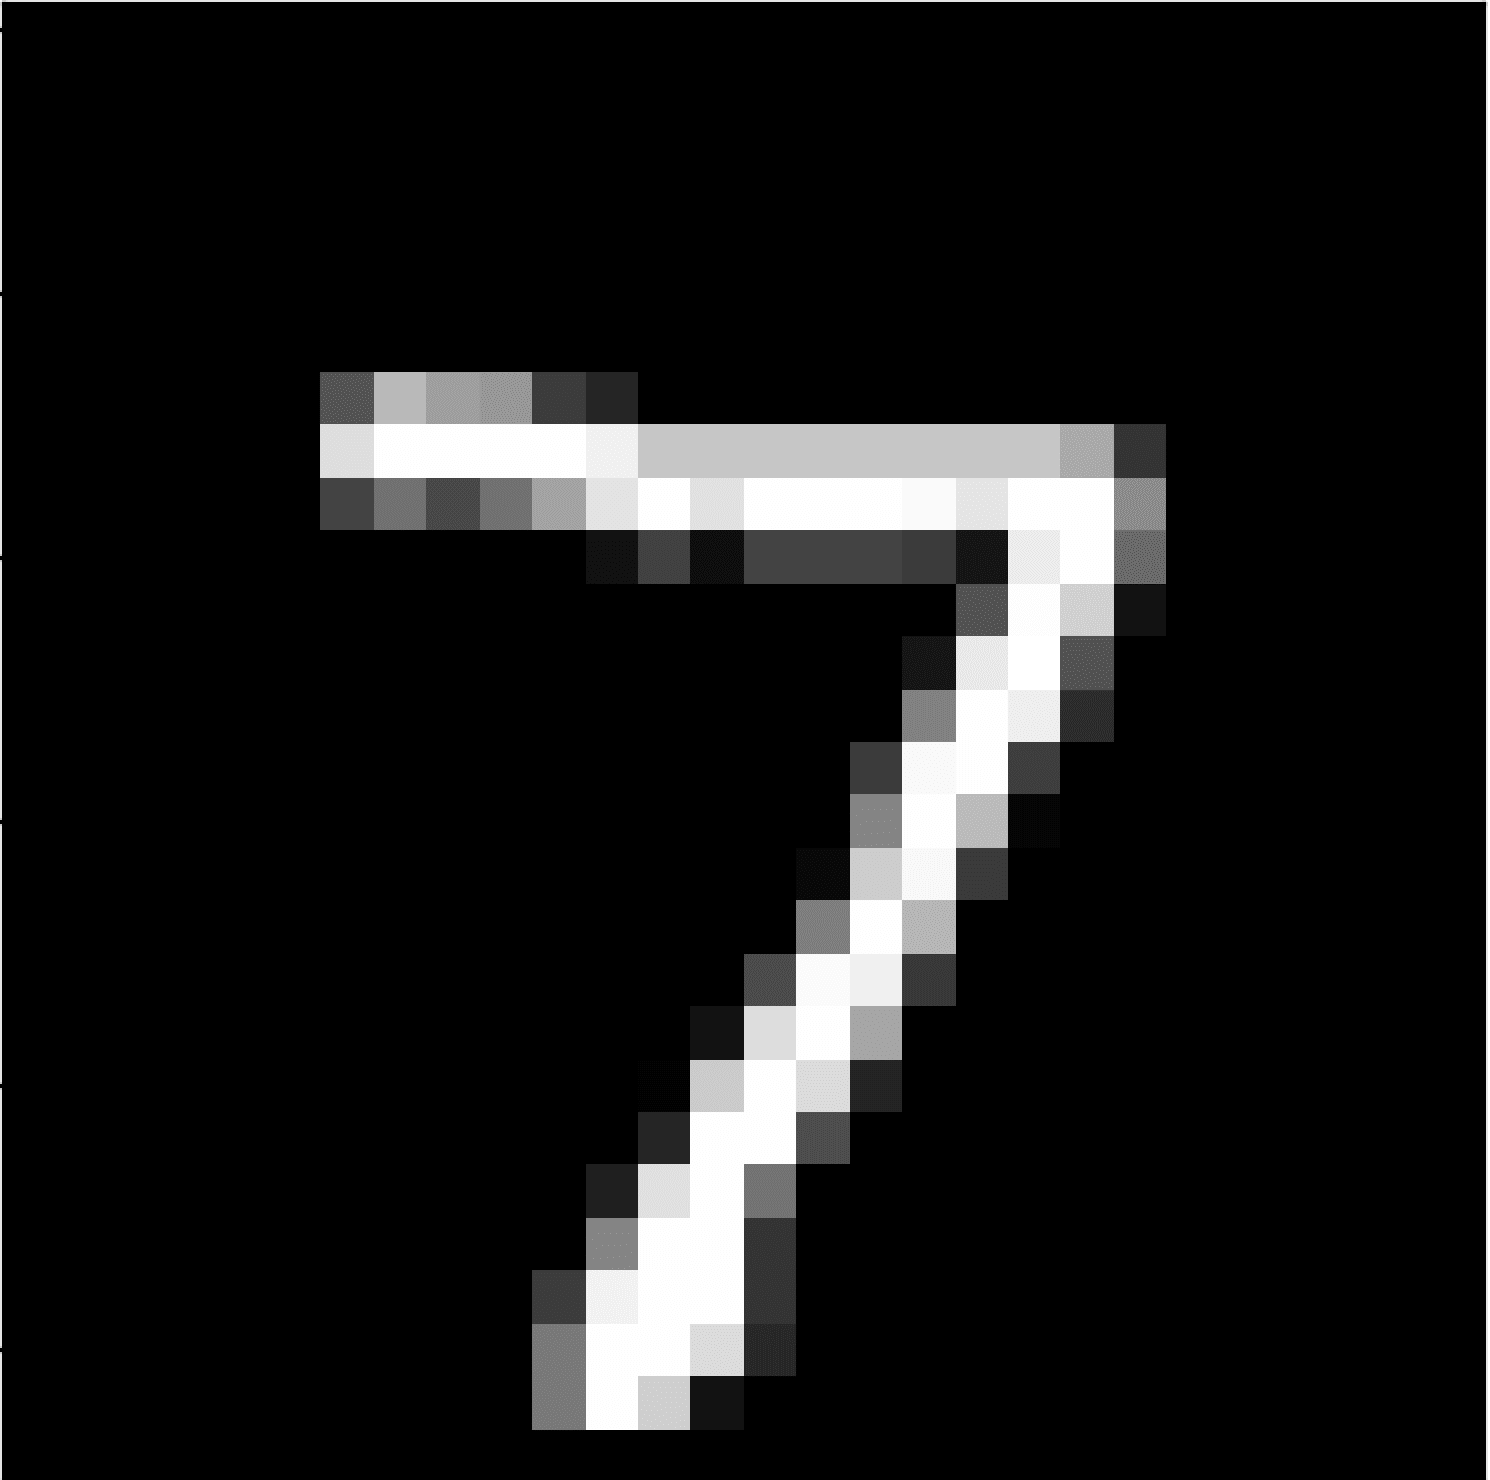

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The Handwritten Digit is recognised as: 7


In [68]:
# combine all steps to predict with a new image for the user if they want test the model
input_image_path=input('Enter the path of the image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

input_image_reshaped=np.reshape(input_image_resize,[1,28,28])

prediction=model.predict(input_image_reshaped)

input_predict_label=np.argmax(prediction)

print('The Handwritten Digit is recognised as:',input_predict_label)






sucessfully model has  predicted  correctly